<a href="https://colab.research.google.com/github/almanmirza/Handwritten-Digit-Recognition/blob/main/ANN_PROJECT_PHASE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Phase 2 - Basic Neural Network**

**Introduction**

**Objective:** Recognize handwritten digits using a basic neural network.

**Dataset:** MNIST (70,000 grayscale images, 28x28 pixels).

**Data Preprocessing**

Combined and stratified split into 60% training, 20% validation, 20% test.

Normalized pixel values to [0, 1].

One-hot encoded labels for multi-class classification.

**Model Architecture**

**Input layer:** 28x28 grayscale image (Conv2D layer).

**Hidden layers:** Convolutional layers with ReLU activation, Batch
Normalization, and Dropout.

**Fully connected layer:** 128 neurons with ReLU activation.

**Output layer:** 10 neurons with Softmax activation.

**Total parameters:** Updated based on CNN structure.


**Training Process**

Adam optimizer with categorical cross-entropy loss.

Early stopping (patience=3) to prevent overfitting.

Training curves showing accuracy and loss progression.


**Results**

**Test accuracy:** ~98%.

Confusion matrix highlights common misclassifications (e.g., 9 ↔ 4).

Classification report detailing precision, recall, and F1-score per class.

**1.1)  IMPORT LIBRARIES**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

**1.2) IMPORT DATASETS**

In [40]:
# Load dataset
train_data = pd.read_csv("/content/mnist_train.csv")
test_data = pd.read_csv("/content/mnist_test.csv")

print("Training Data Sample:")
print(train_data.head())
print("Testing Data Sample:")
print(test_data.head())


Training Data Sample:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Testing Data Sample:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0  

**1.3) EXTRACT AND RESHAPE IMAGE PIXEL**

In [61]:
# Extract labels and pixel values
labels = train_data['label'].values
pixels = train_data.drop('label', axis=1).values

# Reshape the image
image_size = (28, 28, 1)
images = pixels.reshape(-1, *image_size)


**1.4) SPLIT DATASET**

In [50]:
# Split train (60%) validation (20%) and test (20%)
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixels
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

**1.5) NORMALIZE DATA PIXELS**

In [51]:
# One-hot encode labels
num_classes = len(np.unique(labels))
y_train, y_val, y_test = to_categorical(y_train, num_classes), to_categorical(y_val, num_classes), to_categorical(y_test, num_classes)

**1.6) VISUALIZE SAMPLE IMAGES**

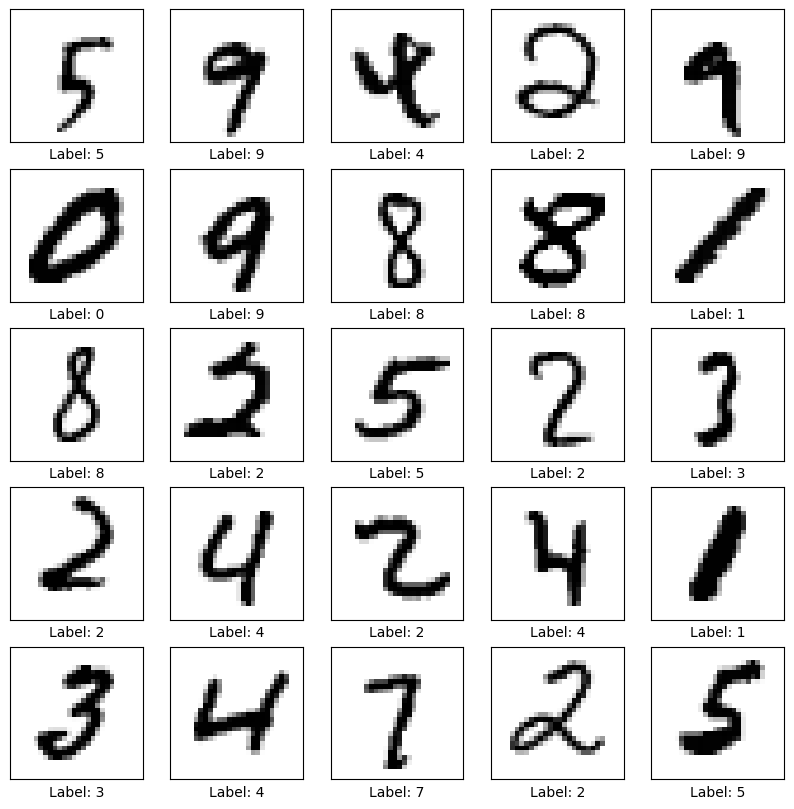

In [52]:
# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {np.argmax(y_train[i])}")
plt.show()


**2.1) APPLYING SEQUENTIAL MODEL**

In [53]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=image_size, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**2.2) COMPILE USING ADAM & CROSS-ENTROPY**

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8458 - loss: 0.7805 - val_accuracy: 0.9807 - val_loss: 0.2773
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9612 - loss: 0.3189 - val_accuracy: 0.9753 - val_loss: 0.2332
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9671 - loss: 0.2621 - val_accuracy: 0.9787 - val_loss: 0.2095
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9720 - loss: 0.2293 - val_accuracy: 0.9803 - val_loss: 0.2068
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9704 - loss: 0.2365 - val_accuracy: 0.9867 - val_loss: 0.1871
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9729 - loss: 0.2294 - val_accuracy: 0.9884 - val_loss: 0.1817
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9734 - loss: 0.2260 - val_accuracy: 0.9864 - val_loss: 0.1891
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9753 - loss: 0.2228

**2.3) PLOTTING ACCURACIES**

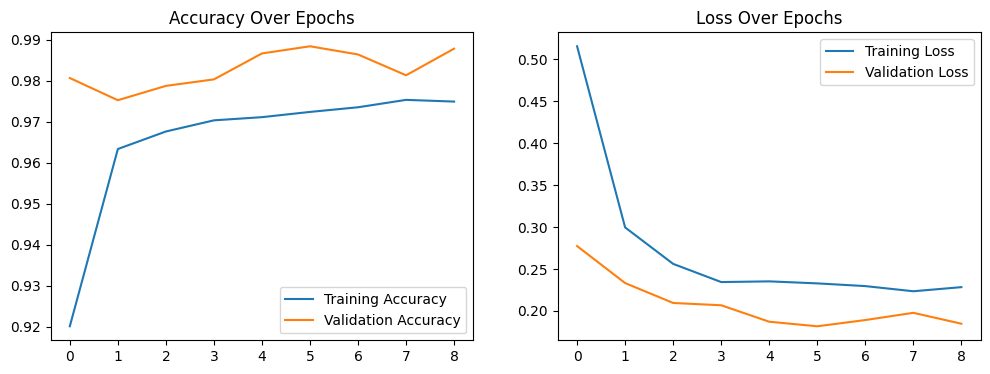

In [55]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

**2.4) EVALUATING TEST ACCURACY**

In [56]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}\nTest Loss: {test_loss:.4f}')

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)



Test Accuracy: 0.9875
Test Loss: 0.1840
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ACCURACY FOUND FROM PREVIOUS PHASE-1 (CNN) TUNNING

**Test Accuracy:** 0.9676

**Test Loss:** 0.1114

HENCE WE FOUND THE IMPROVED VERSION OF CNN MODEL USING FULL CONNECTED LAYERS

**2.5) GENERATING CONFUSION MATRIX**

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[1163    0    0    0    1    2    2    0    4    1]
 [   0 1292    4    0    3    0    0    0    0    0]
 [   2    3 1145    2    1    0    0    6    1    0]
 [   0    0    5 1255    0    5    0    5    4    2]
 [   1    2    0    0 1149    0    2    0    1    3]
 [   1    0    0    1    0 1090    3    0    7    1]
 [   3    0    0    0    3    1 1237    0    2    0]
 [   0    2   12    0    4    0    0 1234    1    2]
 [   0    1    4    1    1    4    1    2 1121    6]
 [   1    1    0    3    7    5    0    7    1 1164]]


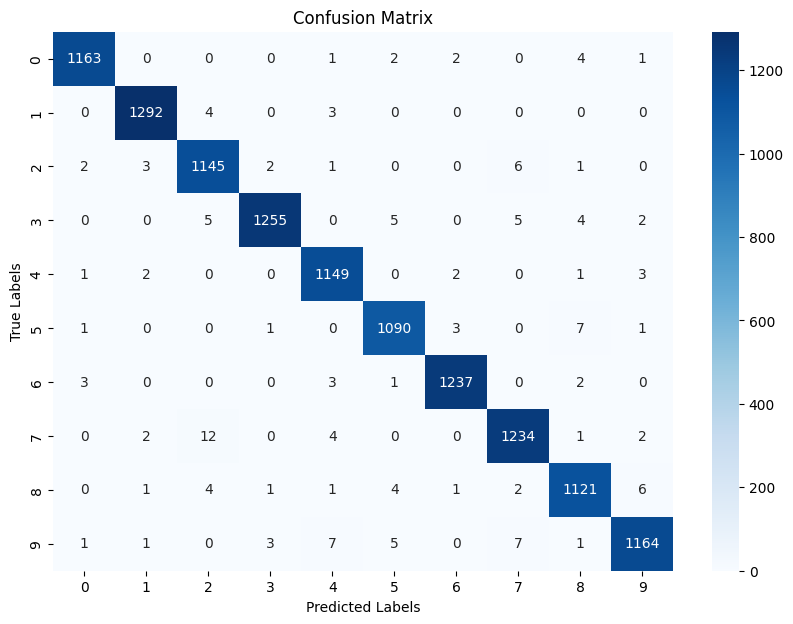


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1173
           1       0.99      0.99      0.99      1299
           2       0.98      0.99      0.98      1160
           3       0.99      0.98      0.99      1276
           4       0.98      0.99      0.99      1158
           5       0.98      0.99      0.99      1103
           6       0.99      0.99      0.99      1246
           7       0.98      0.98      0.98      1255
           8       0.98      0.98      0.98      1141
           9       0.99      0.98      0.98      1189

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [57]:
# Confusion matrix and classification report
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


**2.6) VISUALIZING FINAL PREDICTION**

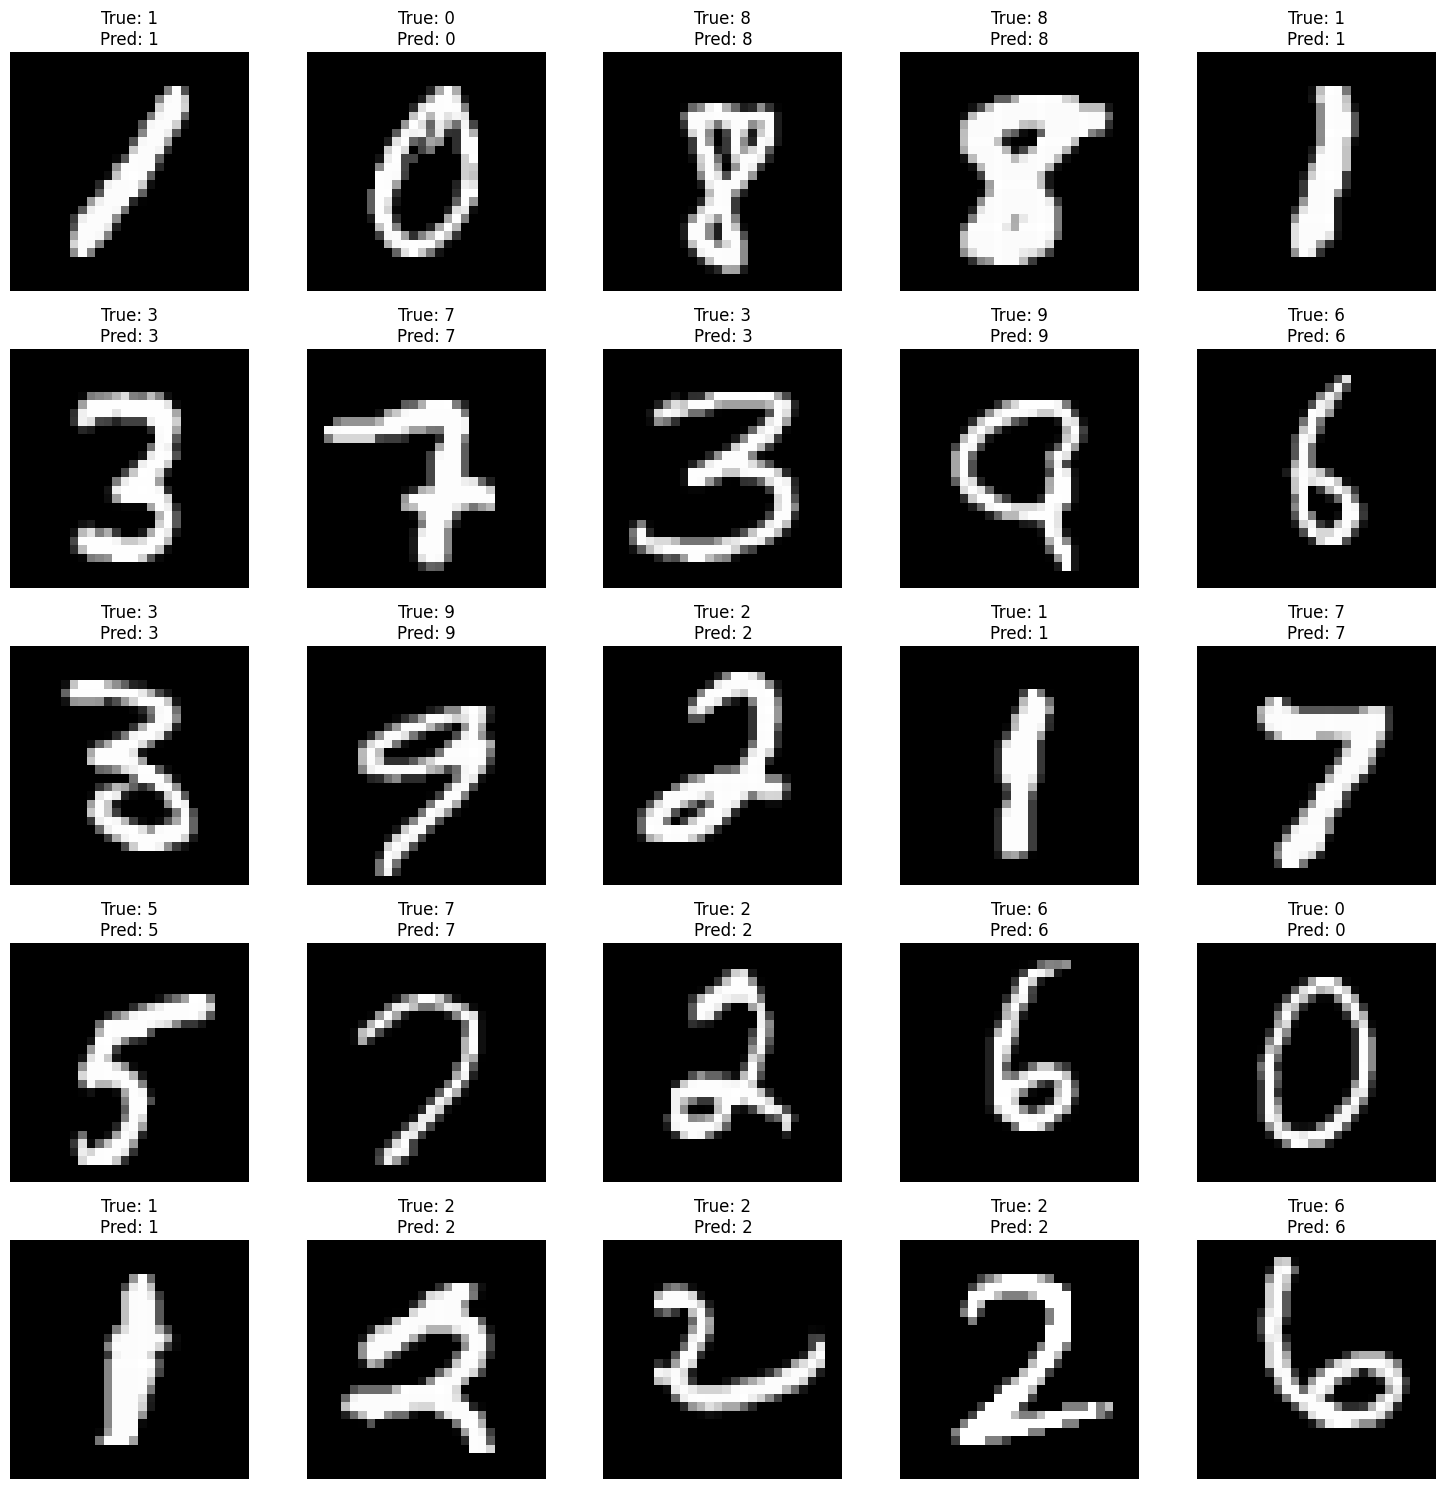

In [58]:
# Visualize some predictions
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_true_classes[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [59]:
# Binarize the labels
y_test_bin = label_binarize(y_true_classes, classes=np.arange(num_classes))

# Store values for ROC and PRC
all_fpr, all_tpr, all_precision, all_recall = [], [], [], []
all_auc_roc, all_auc_pr = [], []

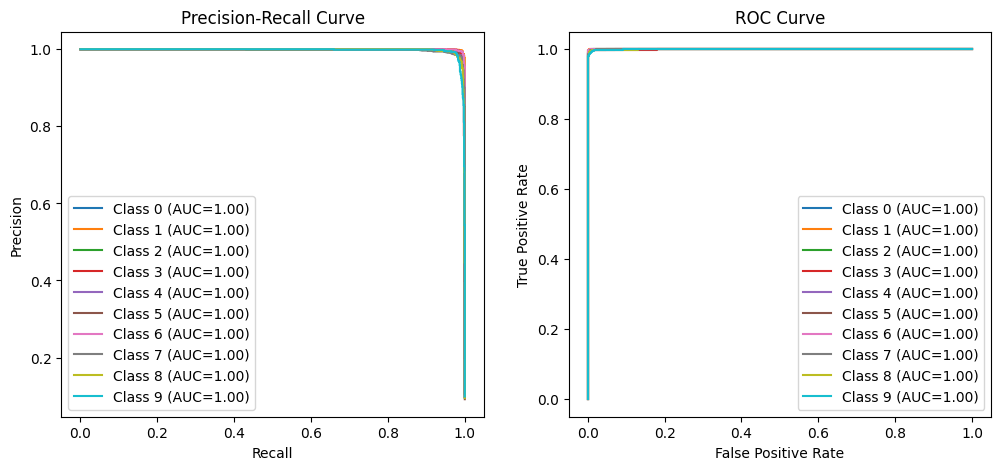

In [60]:
plt.figure(figsize=(12, 5))

# PR and ROC curves for each class
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred[:, i])
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_precision.append(precision)
    all_recall.append(recall)
    all_auc_roc.append(roc_auc)
    all_auc_pr.append(pr_auc)

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f'Class {i} (AUC={pr_auc:.2f})')

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc:.2f})')

# Plot Precision and Recall Curve
plt.subplot(1, 2, 1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()
